In [1]:
# 'C:/Users/pcpow/OneDrive/Desktop/ML-Poject_20230404/UPLOAD_CSV_EUR_USD_HIST_OHLCV_FIND_DIRECTION_20230405_1030am.csv'
# "C:/Users/pcpow/OneDrive/Desktop/ML-Poject_20230404/No_NaN_UPLOAD_CSV_EUR_USD_HIST_OHLCV_FIND_DIRECTION_20230405_5pm.csv"


In [2]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "C:/Users/pcpow/OneDrive/Desktop/ML-Poject_20230404/No_NaN_UPLOAD_CSV_EUR_USD_HIST_OHLCV_FIND_DIRECTION_20230405_5pm.csv"
df = pd.read_csv(input_file, header = 0)
df.head()

,Date,Open,High,Low,Close,Tick Volume,PX DIFF OPEN CLOSE,PX DIFF HIGH LOW,MID,P/L,% Change,% Change ABS,REVERSAL INDICATOR,Tick Volume Group,5 Day Moving Avg. (Close),UPTREND / DOWN TREND 5,21 Day Moving Avg. (Close),UPTREND / DOWN TREND 21,MANUAL BUY / SELL
0,20140305,20.56,20.59,20.52,20.52,1701,0.04,0.07,20.555,0.0,0.57,0.57,0,LOW,20.446,DOWN TREND,20.320000,UP TREND,HOLD
1,20140306,20.67,20.67,20.61,20.63,5042,0.04,0.06,20.640,0.0,0.67,0.67,0,HIGH,20.460,UP TREND,20.368571,UP TREND,HOLD
2,20140307,20.60,20.60,20.48,20.49,57641,0.11,0.12,20.540,0.0,0.92,0.92,0,HIGH,20.466,UP TREND,20.414286,UP TREND,HOLD
3,20140310,20.41,20.49,20.30,20.49,53896,-0.08,0.19,20.395,0.0,-0.42,0.42,0,HIGH,20.536,DOWN TREND,20.445238,UP TREND,HOLD
4,20140311,20.49,20.49,20.30,20.33,14200,0.16,0.19,20.395,0.0,0.84,0.84,0,HIGH,20.492,DOWN TREND,20.457143,UP TREND,HOLD


In [3]:
d = {'HIGH': 1, 'LOW': 0}
e = {'DOWN TREND': 1, 'NO TREND': 2, 'UP TREND': 3}
f = {'BUY': 1, 'HOLD': 2, 'SELL': 3}




In [4]:
df['Tick Volume Group'] = df['Tick Volume Group'].map(d)
df['UPTREND / DOWN TREND 5'] = df['UPTREND / DOWN TREND 5'].map(e)
df['UPTREND / DOWN TREND 21'] = df['UPTREND / DOWN TREND 21'].map(e)
df['MANUAL BUY / SELL'] = df['MANUAL BUY / SELL'].map(f)






In [5]:
df.head()

,Date,Open,High,Low,Close,Tick Volume,PX DIFF OPEN CLOSE,PX DIFF HIGH LOW,MID,P/L,% Change,% Change ABS,REVERSAL INDICATOR,Tick Volume Group,5 Day Moving Avg. (Close),UPTREND / DOWN TREND 5,21 Day Moving Avg. (Close),UPTREND / DOWN TREND 21,MANUAL BUY / SELL
0,20140305,20.56,20.59,20.52,20.52,1701,0.04,0.07,20.555,0.0,0.57,0.57,0,0,20.446,1,20.320000,3,2
1,20140306,20.67,20.67,20.61,20.63,5042,0.04,0.06,20.640,0.0,0.67,0.67,0,1,20.460,3,20.368571,3,2
2,20140307,20.60,20.60,20.48,20.49,57641,0.11,0.12,20.540,0.0,0.92,0.92,0,1,20.466,3,20.414286,3,2
3,20140310,20.41,20.49,20.30,20.49,53896,-0.08,0.19,20.395,0.0,-0.42,0.42,0,1,20.536,1,20.445238,3,2
4,20140311,20.49,20.49,20.30,20.33,14200,0.16,0.19,20.395,0.0,0.84,0.84,0,1,20.492,1,20.457143,3,2


In [6]:
features = list(df.columns[:18])
features

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 ' Tick Volume ',
 'PX DIFF OPEN CLOSE',
 'PX DIFF HIGH LOW',
 'MID',
 'P/L',
 '% Change',
 '% Change ABS',
 'REVERSAL INDICATOR',
 'Tick Volume Group',
 ' 5 Day Moving Avg. (Close) ',
 'UPTREND / DOWN TREND 5',
 ' 21 Day Moving Avg. (Close) ',
 'UPTREND / DOWN TREND 21']

In [7]:
label = df['MANUAL BUY / SELL']
label

0      2
1      2
2      2
3      2
4      2
      ..
438    2
439    2
440    2
441    2
442    1
Name: MANUAL BUY / SELL, Length: 443, dtype: int64

In [8]:
y = label
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)


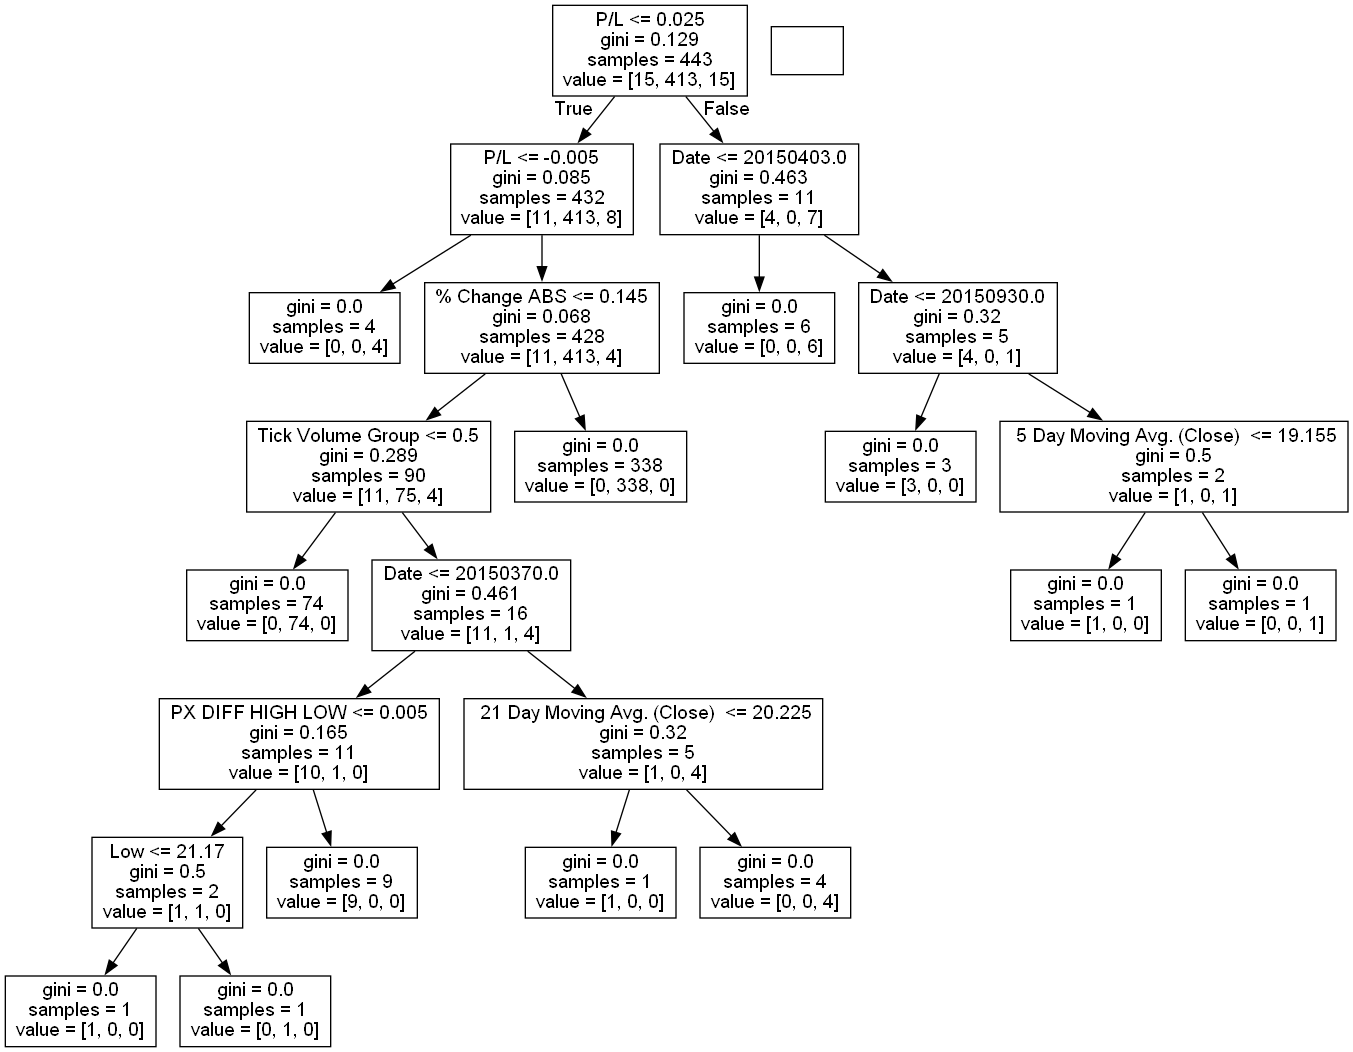

In [9]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [10]:
df

,Date,Open,High,Low,Close,Tick Volume,PX DIFF OPEN CLOSE,PX DIFF HIGH LOW,MID,P/L,% Change,% Change ABS,REVERSAL INDICATOR,Tick Volume Group,5 Day Moving Avg. (Close),UPTREND / DOWN TREND 5,21 Day Moving Avg. (Close),UPTREND / DOWN TREND 21,MANUAL BUY / SELL
0,20140305,20.56,20.59,20.52,20.52,1701,0.04,0.07,20.555,0.00,0.57,0.57,0,0,20.446,1,20.320000,3,2
1,20140306,20.67,20.67,20.61,20.63,5042,0.04,0.06,20.640,0.00,0.67,0.67,0,1,20.460,3,20.368571,3,2
2,20140307,20.60,20.60,20.48,20.49,57641,0.11,0.12,20.540,0.00,0.92,0.92,0,1,20.466,3,20.414286,3,2
3,20140310,20.41,20.49,20.30,20.49,53896,-0.08,0.19,20.395,0.00,-0.42,0.42,0,1,20.536,1,20.445238,3,2
4,20140311,20.49,20.49,20.30,20.33,14200,0.16,0.19,20.395,0.00,0.84,0.84,0,1,20.492,1,20.457143,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,20160212,17.02,17.10,17.02,17.10,3535,-0.08,0.08,17.060,0.00,-1.00,1.00,0,1,17.118,1,18.061429,1,2
439,20160216,17.61,17.77,17.61,17.77,2160,-0.16,0.16,17.690,0.00,-1.00,1.00,0,1,17.180,3,18.023810,1,2
440,20160217,18.00,18.08,18.00,18.08,2160,-0.08,0.08,18.040,0.00,-1.00,1.00,0,1,17.388,3,18.005238,1,2
441,20160218,18.18,18.18,18.18,18.18,891,0.00,0.00,18.180,0.00,0.00,0.00,1,0,17.588,3,17.979524,1,2


In [12]:
df.to_excel(r'C:/Users/pcpow/OneDrive/Desktop/ML-Poject_20230404/DF_BUY_SELL_EUR_USD.xlsx', index=False)

In [18]:
# Ensemble learning – Using a random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

# Predict BUY, SELL, HOLD
# f = {'BUY': 1, 'HOLD': 2, 'SELL': 3}
print (clf.predict([[20151126, 20.5, 20.62, 20.48, 20.48, 4828, 0.02, 0.14,	20.55, 0, 
                     0.14, 0.14, 1, 1, 20.392, 3, 20.39857143, 3]]))

print (clf.predict([[999, 20.5, 20.62, 20.48, 20.48, 4828, 0.02, 0.14,	20.55, 0, 
                     0.14, 0.14, 1, 1, 20.392, 3, 20.39857143, 3]]))

# 20140723,21.63,21.63,21.62,21.63,2456,0,0.01,21.625,0,0,0,1,1,21.486,3,21.43238095,3
# print (clf.predict([[20140723,21.63,21.63,21.62,21.63,2456,0,0.01,21.625,0,0,0,1,1,21.486,3,21.43238095,3]]))
print (clf.predict([[20230723,21.63,21.63,21.62,21.63,2456,0,0.01,21.625,0,0,0,1,1,21.486,3,21.43238095,3]]))


# -------------------------------
# f = {'BUY': 1, 'HOLD': 2, 'SELL': 3}
prediction = x



# Predict employment of an unemployed 10-yr veteran
#print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[3]
[3]
[1]


C:\Users\pcpow\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pcpow\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pcpow\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
